In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/adxg/Documents/Dataset.csv')

In [4]:
print(df.head())

  school sex address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0     GP   F       U     GT3       A     4   4.0  at_home   teacher  course   
1     GP   F       U     GT3       T     1   1.0  at_home     other  course   
2     GP   F       U     LE3       T     1   1.0  at_home     other   other   
3     GP   F       U     GT3       T     4   2.0   health  services    home   
4     GP   F       U     GT3       T     3   3.0    other     other    home   

   ... Dalc  health  absences  G1    G2  G3 Feature_1 Feature_2 Feature_3  \
0  ...    1       3       4.0   0  11.0  11      18.0       2.0       1.0   
1  ...    1       3       2.0   9  11.0  11      17.0       2.0       1.0   
2  ...    2       3       6.0  12  13.0  12      15.0       NaN       3.0   
3  ...    1       5       0.0  14  14.0  14      15.0       3.0       1.0   
4  ...    1       5       0.0  11  13.0  13      16.0       NaN       2.0   

  romantic  
0       no  
1       no  
2       no  
3      yes

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [6]:
print(df.describe())

             Medu        Fedu  traveltime    failures      famrel    freetime  \
count  649.000000  576.000000  576.000000  649.000000  649.000000  604.000000   
mean     2.514638    2.303819    1.574653    0.221880    3.930663    3.172185   
std      1.134552    1.111076    0.744592    0.593235    0.955717    1.044684   
min      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    0.000000    4.000000    3.000000   
50%      2.000000    2.000000    1.000000    0.000000    4.000000    3.000000   
75%      4.000000    3.000000    2.000000    0.000000    5.000000    4.000000   
max      4.000000    4.000000    4.000000    3.000000    5.000000    5.000000   

            goout        Dalc      health    absences          G1          G2  \
count  649.000000  649.000000  649.000000  580.000000  649.000000  614.000000   
mean     3.184900    1.502311    3.536210    3.746552   11.399076   11.586319   
std      1.175766    0.9248

In [7]:
print(df.isnull().sum())

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64


In [8]:
anonymous_features = ['Feature_1', 'Feature_2', 'Feature_3']

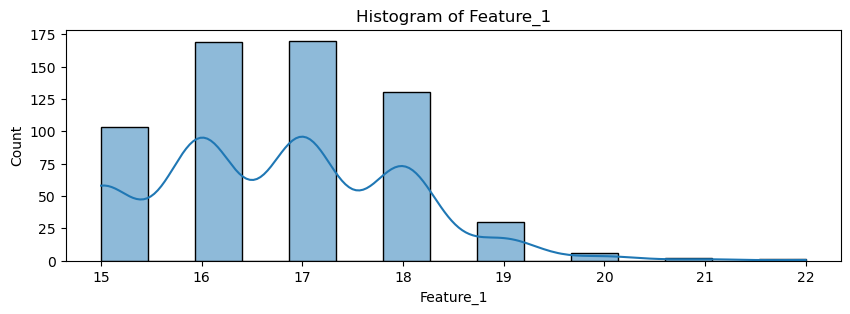

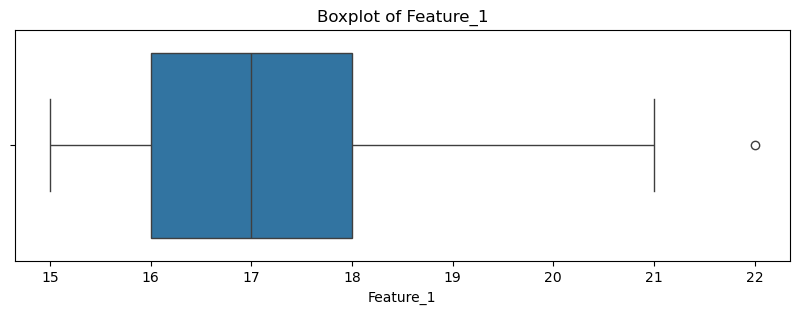

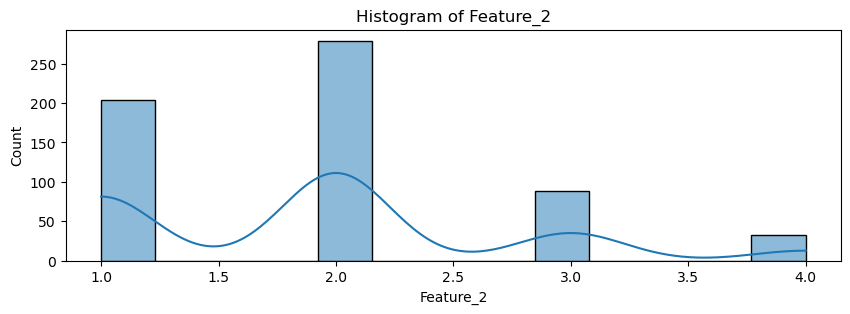

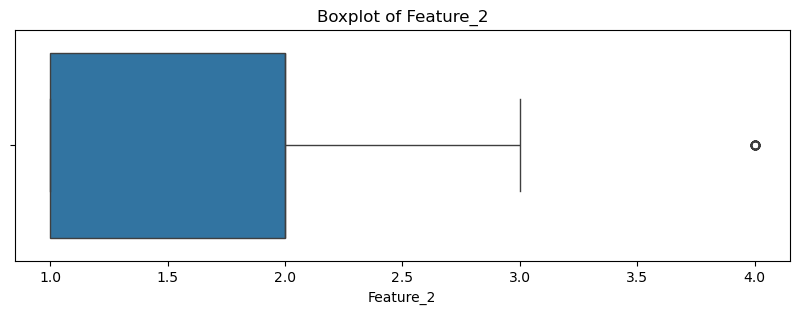

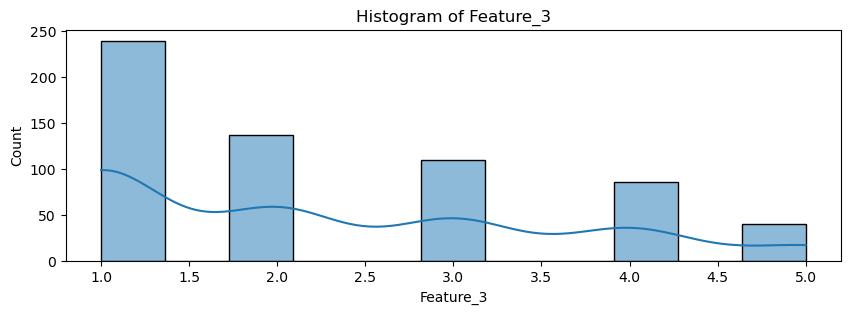

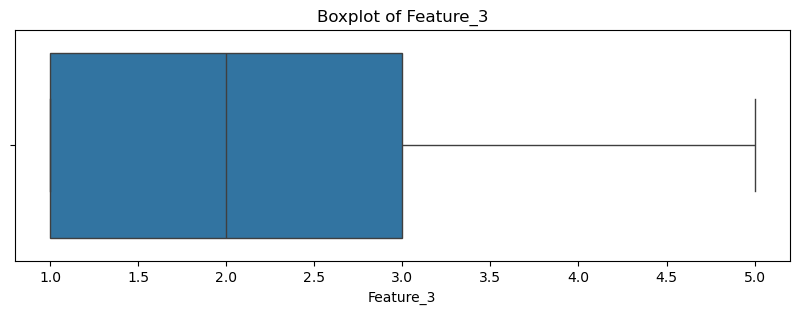

In [9]:
for feature in anonymous_features:
    plt.figure(figsize=(10,3))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()
    
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [10]:
non_numeric = df.select_dtypes(exclude='number').columns.tolist()
print("Non-numeric columns:", non_numeric)

Non-numeric columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


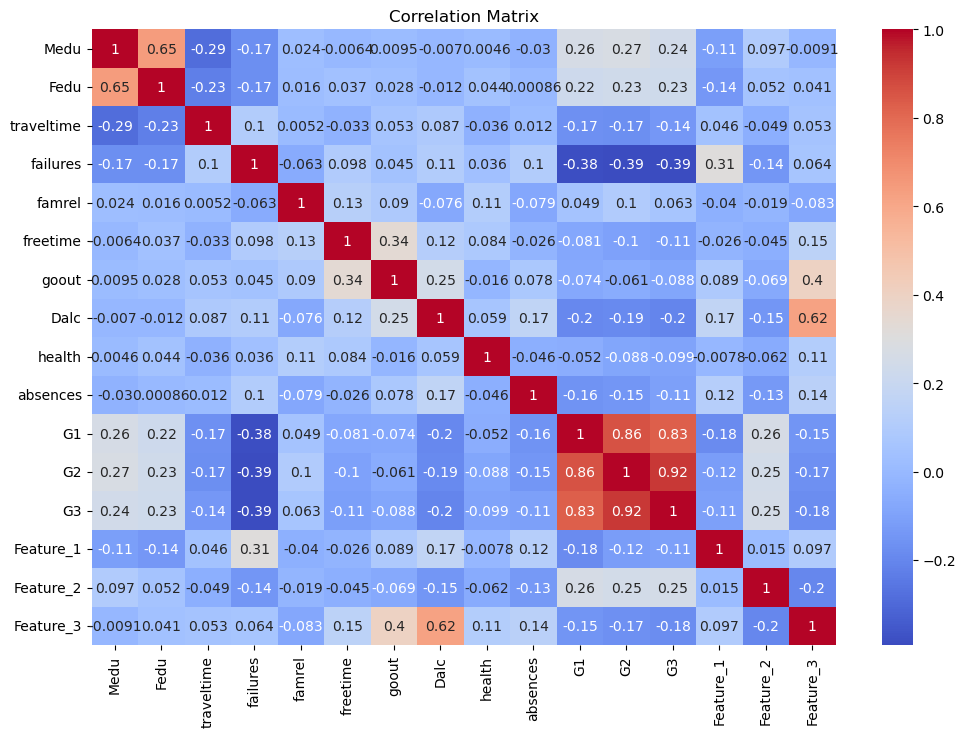

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Feature_1 does not really correlation with anything ,but as this dataset is of highschool students and the values are like that it can be their 'age'.

- Feature_2 can represent 'study time of students'(1 to 5),because grades G1,G2,G3 are increasing as Feature_2 is increasing and it's correlation values, while not extremely high, are clearly positive and stronger than for many other features.

- Feature_3 likely represents a 'social or leisure activity metric' such as frequency of socializing, party attendance, or general sociability.Feature_3 is strongly positively correlated with both going out with friends (0.4) and weekday alcohol consumption (0.62), as shown in the correlation matrix.

#  Data Integrity Audit-FILLING MISSING VALUES

In [12]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

famsize       50
Fedu          73
traveltime    73
higher        76
freetime      45
absences      69
G2            35
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64


- Since Fedu has missing values and it is strongly correlated with Medu(0.65), For each row where Fedu is missing, fill it with the corresponding value from Medu.

In [13]:
df['Fedu'] = df['Fedu'].fillna(df['Medu'])

In [14]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

famsize       50
traveltime    73
higher        76
freetime      45
absences      69
G2            35
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64


- G2 has Missing values, which were imputed using a weighted average of G1 and G3 (weights based on their correlations: 0.86 and 0.92, respectively). The imputed values were then rounded and converted to integers to match the grading system.

In [15]:
weight_g1 = 0.86 / (0.86 + 0.92)
weight_g3 = 0.92 / (0.86 + 0.92)

missing_g2_mask = df['G2'].isnull()

df.loc[missing_g2_mask, 'G2'] = (
    df.loc[missing_g2_mask, 'G1'] * weight_g1 +
    df.loc[missing_g2_mask, 'G3'] * weight_g3
)

# Rounding off and converting to a integer value, and clipping to valid range if needed.

df['G2'] = df['G2'].round().clip(0, 20).astype(int)

In [16]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

famsize       50
traveltime    73
higher        76
freetime      45
absences      69
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64


- higher

In [17]:
avg_grade = df['G3'].median()

lower_grades = df[df['G3'] < avg_grade]

higher_grades = df[df['G3'] >= avg_grade]

percent_lower_higher = (lower_grades['higher'] == 'yes').mean() * 100

percent_higher_higher = (higher_grades['higher'] == 'yes').mean() * 100

print(f"Lower grades, chose higher education: {percent_lower_higher:.1f}%")
print(f"Higher grades, chose higher education: {percent_higher_higher:.1f}%")


Lower grades, chose higher education: 69.1%
Higher grades, chose higher education: 86.5%


In [18]:
from scipy.stats import pointbiserialr

df['higher_binary'] = df['higher'].map({'yes': 1, 'no': 0})

num_cols = df.select_dtypes(include='number').columns.drop('higher_binary')

for col in num_cols:
    temp = df[['higher_binary', col]].dropna()
    if len(temp) > 1:  
        corr, pval = pointbiserialr(temp['higher_binary'], temp[col])
        print(f"Correlation between higher and {col}: {corr:.2f} (p-value: {pval:.4f})")
   


Correlation between higher and Medu: 0.20 (p-value: 0.0000)
Correlation between higher and Fedu: 0.19 (p-value: 0.0000)
Correlation between higher and traveltime: -0.08 (p-value: 0.0597)
Correlation between higher and failures: -0.31 (p-value: 0.0000)
Correlation between higher and famrel: 0.05 (p-value: 0.2716)
Correlation between higher and freetime: -0.10 (p-value: 0.0190)
Correlation between higher and goout: -0.09 (p-value: 0.0376)
Correlation between higher and Dalc: -0.15 (p-value: 0.0004)
Correlation between higher and health: 0.02 (p-value: 0.5727)
Correlation between higher and absences: -0.15 (p-value: 0.0006)
Correlation between higher and G1: 0.35 (p-value: 0.0000)
Correlation between higher and G2: 0.34 (p-value: 0.0000)
Correlation between higher and G3: 0.34 (p-value: 0.0000)
Correlation between higher and Feature_1: -0.25 (p-value: 0.0000)
Correlation between higher and Feature_2: 0.21 (p-value: 0.0000)
Correlation between higher and Feature_3: -0.10 (p-value: 0.0174)


- filling the missing values in higher education column with corresponding grades and failures  

In [19]:
import numpy as np

avg_grade = df['G3'].mean()

conditions = [
    (df['G3'] > avg_grade),
    (df['G3'] <= avg_grade) & (df['failures'] > 1),
    (df['G3'] <= avg_grade) & (df['failures'] <=1)
]

choices = ['yes', 'no', 'yes']

missing_higher_mask = df['higher'].isnull()

df.loc[missing_higher_mask, 'higher'] = np.select(
    [cond[missing_higher_mask] for cond in conditions],
    choices,
    default='no'  
)

print(df['higher'].value_counts())


higher
yes    582
no      67
Name: count, dtype: int64


In [20]:
if 'higher_binary' in df.columns:
    df.drop(columns=['higher_binary'], inplace=True)

In [21]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

famsize       50
traveltime    73
freetime      45
absences      69
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64


- Filling missing values in 'famsize' with the mode

In [22]:
df.fillna({'famsize': df['famsize'].mode()[0]}, inplace=True)

- filling remaining missing values by median 

In [23]:
for col in ['traveltime', 'freetime', 'absences', 'Feature_1', 'Feature_2', 'Feature_3']:
    df.fillna({col : df[col].median()}, inplace=True)

In [24]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


# Exploratory Insight Report 

## 1. Parental Education/Involvement and Student Success

/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/4187717824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fedu', y='G3', data=df, palette='Blues')
/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/4187717824.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medu', y='G3', data=df, palette='Greens')


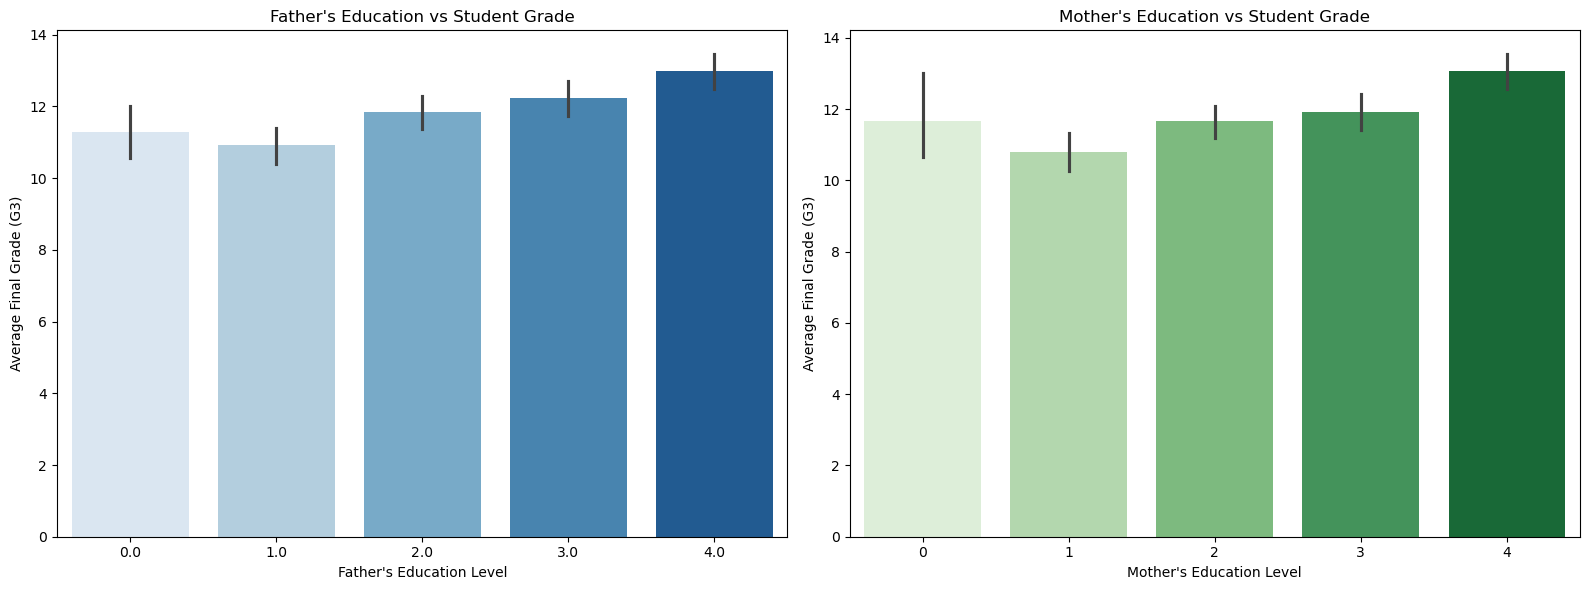

In [25]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.barplot(x='Fedu', y='G3', data=df, palette='Blues')
plt.xlabel("Father's Education Level")
plt.ylabel('Average Final Grade (G3)')
plt.title("Father's Education vs Student Grade")

plt.subplot(1,2,2)
sns.barplot(x='Medu', y='G3', data=df, palette='Greens')
plt.xlabel("Mother's Education Level")
plt.ylabel('Average Final Grade (G3)')
plt.title("Mother's Education vs Student Grade")

plt.tight_layout()
plt.show()

- Insight: Students whose parents are more involved in their education (e.g., higher parental education, engagement in school activities) tend to achieve higher academic performance.

- Interpretation: this BarPlot show as parental education increases student final grades are incresing.

## 2. Impact of Past Failures on Academic Performance

/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/2324759402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='failures', y='G3', data=df, inner='quartile', palette='Set2')


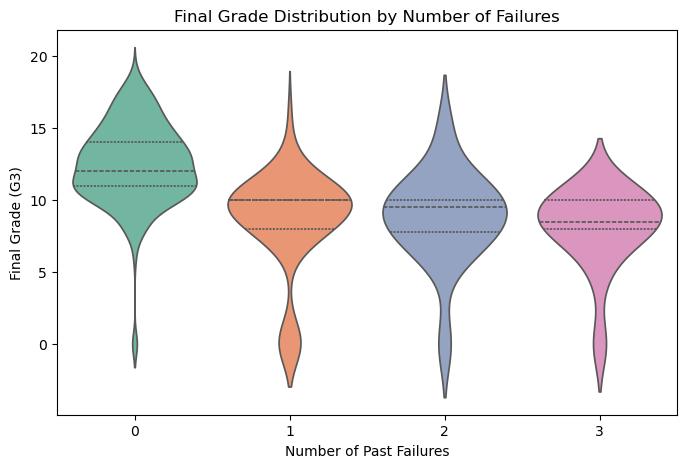

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(x='failures', y='G3', data=df, inner='quartile', palette='Set2')
plt.xlabel('Number of Past Failures')
plt.ylabel('Final Grade (G3)')
plt.title('Final Grade Distribution by Number of Failures')
plt.show()


- Insight: Students with zero failures have a wide range of grades, including many high performers.
    Students with one or more failures are much more likely to have lower final grades, and very few achieve high marks.
- Interpretation: This violin plot shows that as the number of past failures increases, the distribution of final grades (G3) shifts lower and becomes more concentrated at the bottom end.

## 3. High Aspirations for Higher Education Even Among Lower-Performing Students

/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/286932949.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='grade_group', y=(df['higher'] == 'yes').astype(int), data=df, ci=None)


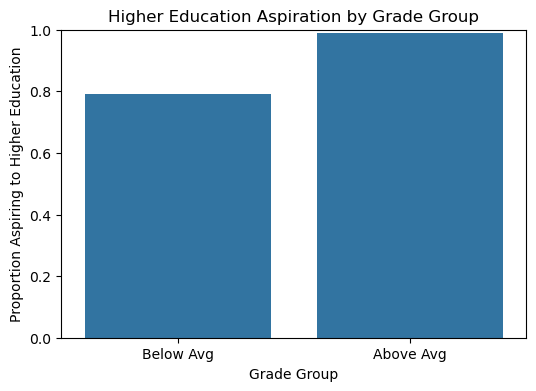

In [27]:

avg_grade = df['G3'].mean()

df['grade_group'] = df['G3'].apply(lambda x: 'Above Avg' if x > avg_grade else 'Below Avg')

plt.figure(figsize=(6,4))
sns.barplot(x='grade_group', y=(df['higher'] == 'yes').astype(int), data=df, ci=None)
plt.xlabel('Grade Group')
plt.ylabel('Proportion Aspiring to Higher Education')
plt.title('Higher Education Aspiration by Grade Group')
plt.ylim(0,1)
plt.show()


- Interpretation: About 80% of students with below-average grades still aspire to higher education.
    Nearly all students with above-average grades also aspire to higher education (the "Above Avg" bar is at 1.0).

- Insight: This finding highlights that aspirations for higher education are very high across the student population, regardless of current academic achievement

## 4. Social Activity and Academic Performance

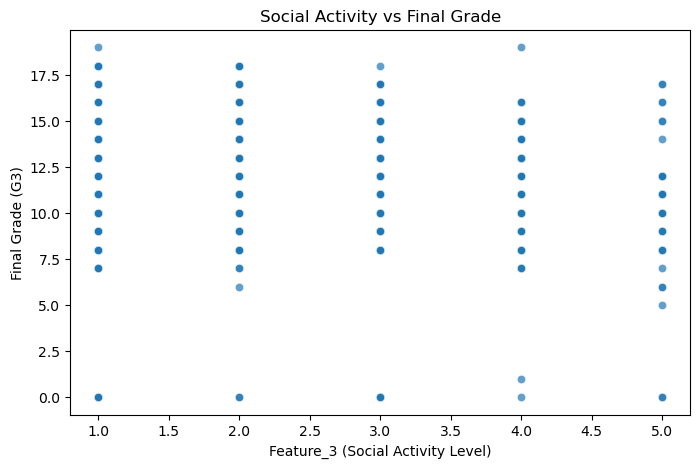

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Feature_3', y='G3', data=df, alpha=0.7)
plt.xlabel('Feature_3 (Social Activity Level)')
plt.ylabel('Final Grade (G3)')
plt.title('Social Activity vs Final Grade')
plt.show()

- Interpretation: The scatterplot shows that as social activity (Feature_3) increases, there is a tendency for final grades (G3) to decrease or become more widely spread. Students with lower social activity scores generally cluster at higher grades, while those with higher social activity scores display a wider range of grades, including more low performers. This suggests that excessive social activity may be associated with lower academic achievement, likely due to diminished study time or distraction.

- Insight: while social activity is important for well-being, excessive or poorly managed social engagement can negatively impact academic performance. Balanced involvement is key to student success.

## 5. paid classes and extracurricular activities and Academic Performance

/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/2867904363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='paid', y='G3', data=df, palette='Set2')


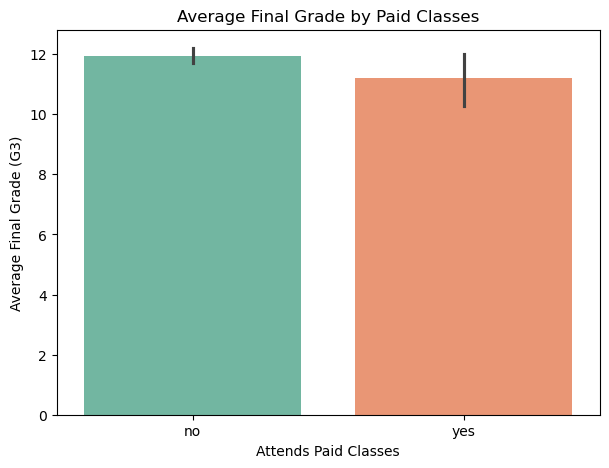

In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x='paid', y='G3', data=df, palette='Set2')
plt.xlabel('Attends Paid Classes')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade by Paid Classes')
plt.show()

/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/654464771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activities', y='G3', data=df, palette='Set3')


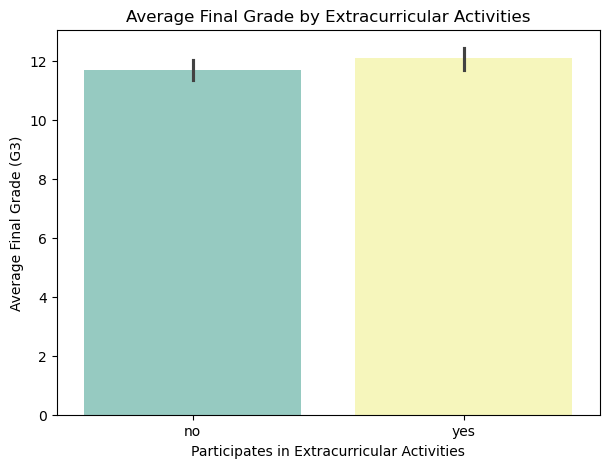

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(x='activities', y='G3', data=df, palette='Set3')
plt.xlabel('Participates in Extracurricular Activities')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade by Extracurricular Activities')
plt.show()


/var/folders/37/vnqwmh0j4lx1941y6tbx7q4c0000gn/T/ipykernel_77595/3978677293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activities', y='absences', data=df, palette='pastel')


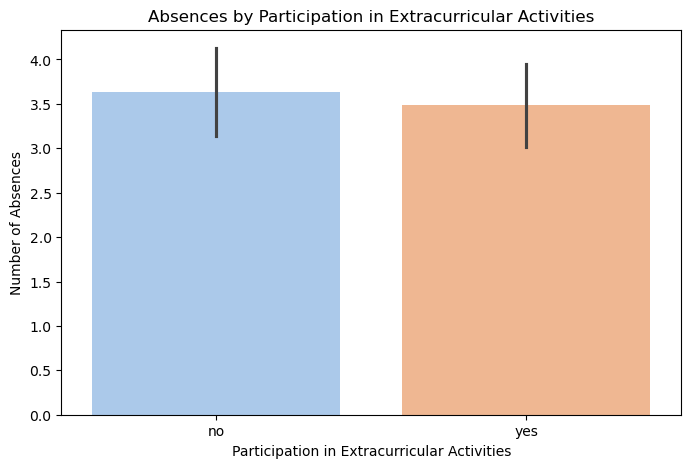

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='activities', y='absences', data=df, palette='pastel')
plt.xlabel('Participation in Extracurricular Activities')
plt.ylabel('Number of Absences')
plt.title('Absences by Participation in Extracurricular Activities')
plt.show()


- Interpretation: Extracurricular activities Consistently linked to slightly higher grades, better attendance, and greater school satisfaction.
Paid classes May not always improve grades, especially if students seek them after falling behind.

- Insight: this bar-Plot shows students who participate in extracurricular activities, and who also maintain good attendance, tend to achieve the highest grades rather than who attends paid classes.

# Relationship Prediction Model 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Custom Logistic Regression Implementation
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []  # Track cost for plotting
        
    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        y: Target vector (n_samples,)
        """
        # Ensure inputs are numpy arrays
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features, dtype=np.float64)
        self.bias = 0.0
        
        # Gradient descent
        for i in range(self.n_iters):
            # Forward pass: compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            # Compute cost (log loss)
            cost = self._compute_cost(y, y_pred)
            self.costs.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Print progress every 200 iterations
            if i % 200 == 0:
                print(f"Cost after iteration {i}: {cost:.6f}")
    
    def predict_prob(self, X):
        """Return prediction probabilities"""
        X = np.array(X, dtype=np.float64)
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Return binary predictions"""
        return (self.predict_prob(X) >= threshold).astype(int)
    
    def _sigmoid(self, x):
        """Sigmoid activation function"""
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def _compute_cost(self, y_true, y_pred):
        """Compute logistic regression cost (log loss)"""
        # Avoid log(0) by adding small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Dataset shape: (649, 15)
Target distribution:
romantic
0    410
1    239
Name: count, dtype: int64
Training set: (519, 15), Test set: (130, 15)
Cost after iteration 0: 0.693147
Cost after iteration 200: 0.649144
Cost after iteration 400: 0.647830
Cost after iteration 600: 0.646856
Cost after iteration 800: 0.646076


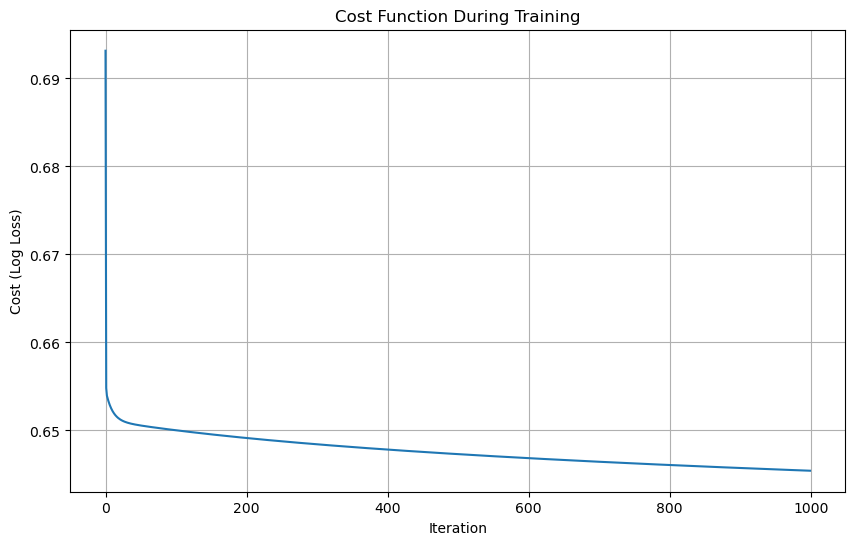

In [54]:
# Prepare your features (you've already done this)
features = ['G1', 'G2', 'G3', 'absences', 'paid', 'activities', 'schoolsup', 
           'famsup', 'internet', 'famsize', 'reason', 'freetime', 'goout']
X = df[features]
X = pd.get_dummies(X, drop_first=True)

# Convert target to binary (0/1)
y = (df['romantic'] == 'yes').astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Train the model
model = MyLogisticRegression(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)

# Plot cost function
plt.figure(figsize=(10, 6))
plt.plot(model.costs)
plt.title('Cost Function During Training')
plt.xlabel('Iteration')
plt.ylabel('Cost (Log Loss)')
plt.grid(True)
plt.show()


Model Accuracy: 0.6308


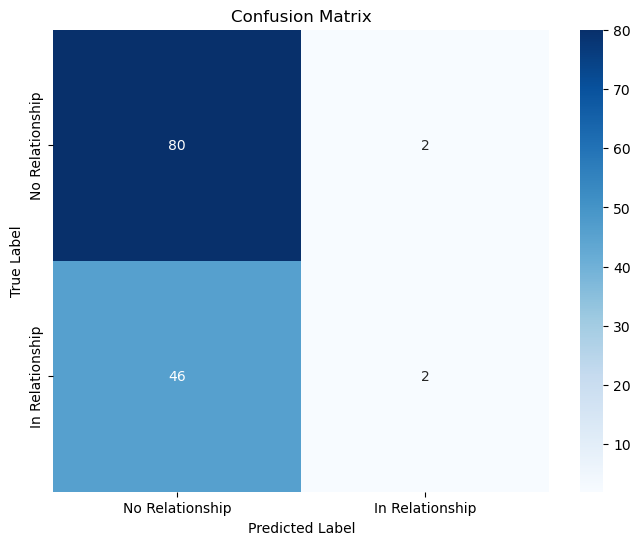


Classification Report:
                 precision    recall  f1-score   support

No Relationship       0.63      0.98      0.77        82
In Relationship       0.50      0.04      0.08        48

       accuracy                           0.63       130
      macro avg       0.57      0.51      0.42       130
   weighted avg       0.59      0.63      0.51       130


Top 10 Most Important Features:
              Feature    Weight  Abs_Weight
14  reason_reputation -0.114287    0.114287
8       schoolsup_yes -0.102201    0.102201
1                  G2 -0.081164    0.081164
5               goout -0.076492    0.076492
13       reason_other  0.075307    0.075307
7      activities_yes  0.059908    0.059908
10       internet_yes  0.050752    0.050752
4            freetime  0.043304    0.043304
11        famsize_LE3  0.043233    0.043233
3            absences  0.032372    0.032372


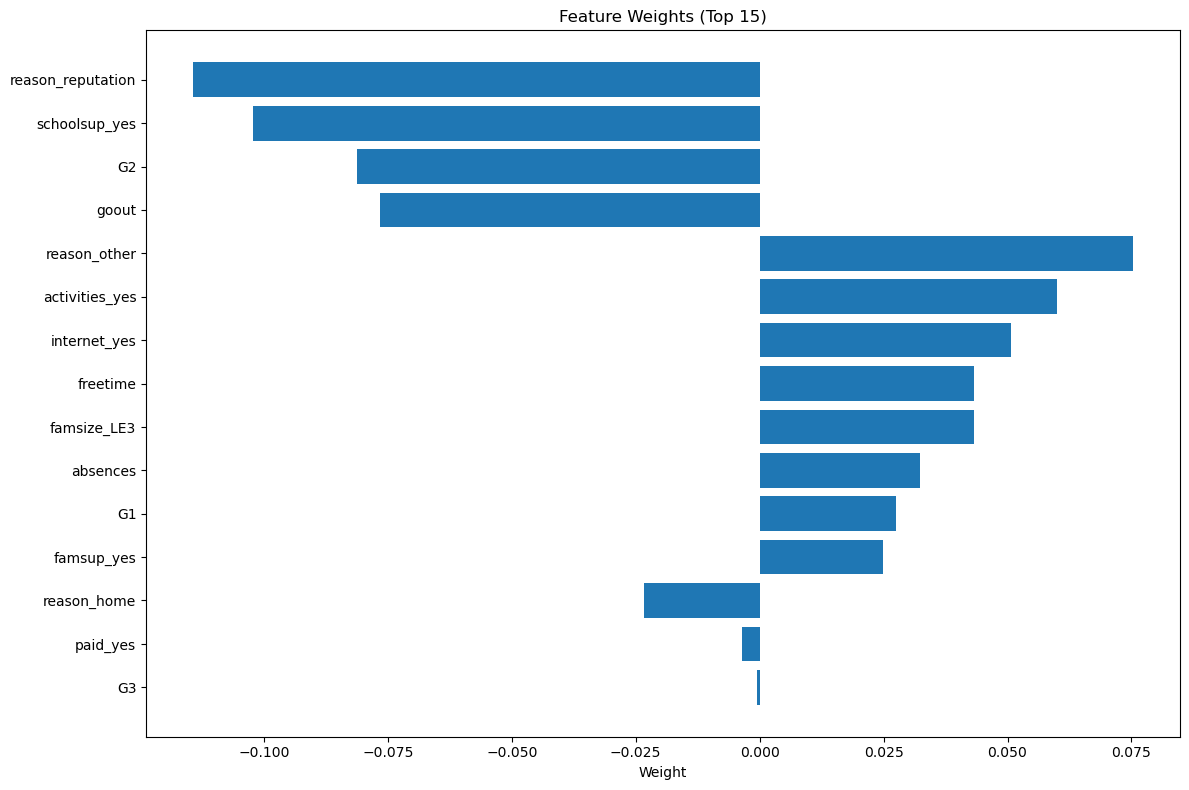

In [55]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_prob(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Relationship', 'In Relationship'],
            yticklabels=['No Relationship', 'In Relationship'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Relationship', 'In Relationship']))

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.weights,
    'Abs_Weight': np.abs(model.weights)
}).sort_values('Abs_Weight', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['Weight'])
plt.title('Feature Weights (Top 15)')
plt.xlabel('Weight')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [56]:
# What the model reveals and what it doesn't
print("=== CRITICAL ANALYSIS ===")
print("\nWhat the model REVEALS:")
print("1. Most important predictors of romantic relationships")
print("2. Which academic/behavioral factors correlate with relationships")
print("3. Model struggles with class imbalance (if present)")

print("\nWhat the model DOESN'T reveal:")
print("1. Causation (only correlation)")
print("2. Temporal relationships (when relationships started)")
print("3. Quality or stability of relationships")
print("4. External factors not in dataset")

# Model limitations
print(f"\nModel Limitations:")
print(f"- Class imbalance: {y.value_counts().iloc[0]/len(y):.2%} vs {y.value_counts().iloc[1]/len(y):.2%}")
print(f"- Limited features: Only academic/behavioral data")
print(f"- Snapshot in time: No longitudinal data")


=== CRITICAL ANALYSIS ===

What the model REVEALS:
1. Most important predictors of romantic relationships
2. Which academic/behavioral factors correlate with relationships
3. Model struggles with class imbalance (if present)

What the model DOESN'T reveal:
1. Causation (only correlation)
2. Temporal relationships (when relationships started)
3. Quality or stability of relationships
4. External factors not in dataset

Model Limitations:
- Class imbalance: 63.17% vs 36.83%
- Limited features: Only academic/behavioral data
- Snapshot in time: No longitudinal data


# Model Reasoning & Interpretation

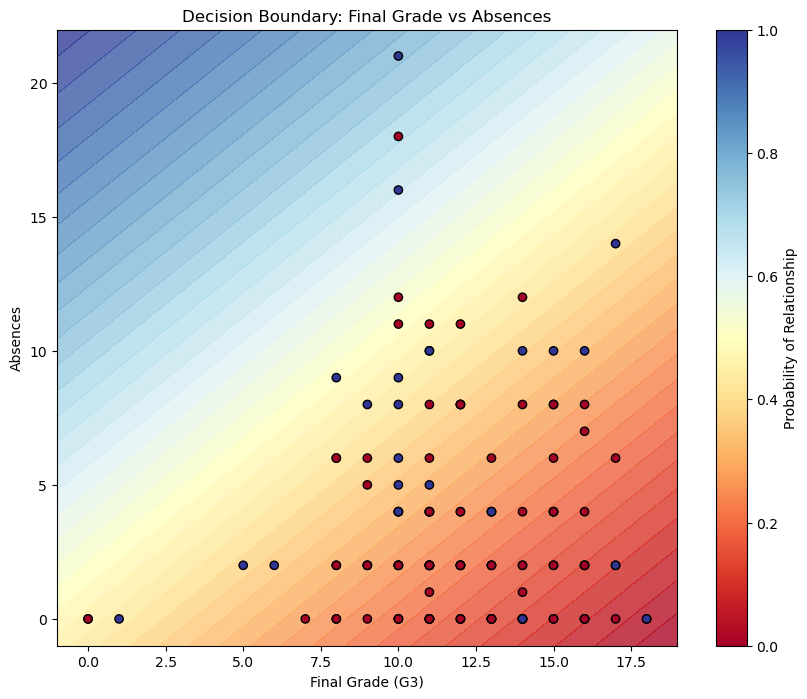

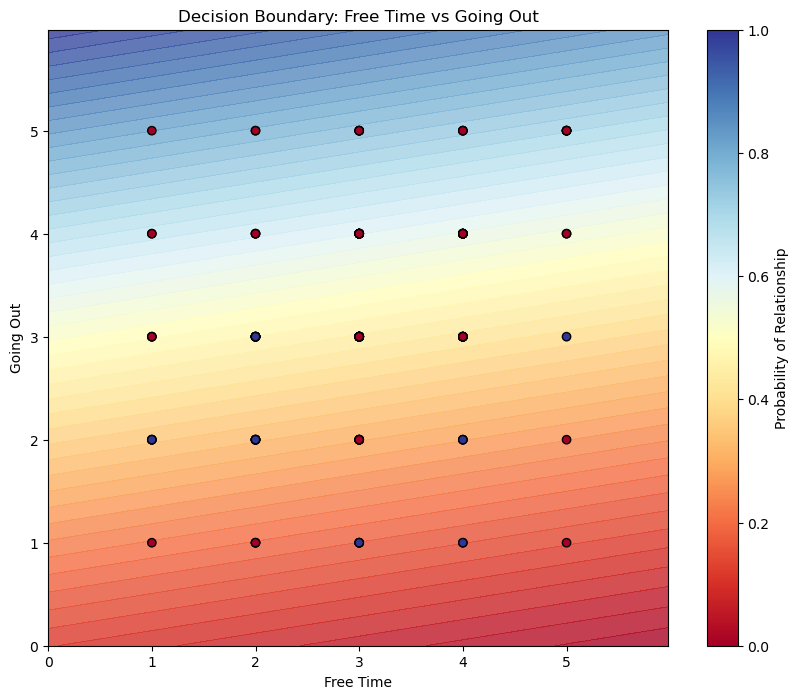

In [57]:
# Choose two meaningful features for 2D visualization
def plot_decision_boundary(X_subset, y_subset, feature1, feature2, model, title):
    """
    Plot decision boundary for two features
    """
    plt.figure(figsize=(10, 8))
    
    # Create a mesh
    h = 0.02  # step size in the mesh
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Create a simple 2D model for visualization
    from sklearn.linear_model import LogisticRegression
    simple_model = LogisticRegression()
    simple_model.fit(X_subset, y_subset)
    
    # Predict on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = simple_model.predict_proba(mesh_points)[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, 
                         cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.colorbar(scatter, label='Probability of Relationship')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Decision Boundary: {title}')
    plt.show()

# Visualize decision boundaries for meaningful feature pairs
# Example 1: Final Grade vs Absences
grade_abs_idx = [X.columns.get_loc('G3'), X.columns.get_loc('absences')]
X_grade_abs = X_test[:, grade_abs_idx]
plot_decision_boundary(X_grade_abs, y_test, 'Final Grade (G3)', 'Absences', 
                      model, 'Final Grade vs Absences')

# Example 2: Free time vs Going out (if available)
if 'freetime' in X.columns and 'goout' in X.columns:
    freetime_goout_idx = [X.columns.get_loc('freetime'), X.columns.get_loc('goout')]
    X_freetime_goout = X_test[:, freetime_goout_idx]
    plot_decision_boundary(X_freetime_goout, y_test, 'Free Time', 'Going Out', 
                          model, 'Free Time vs Going Out')


In [64]:
import numpy as np
import pandas as pd

# Ensure your data is in the right format
print("Before conversion:")
print("X_train dtype:", X_train.dtype if hasattr(X_train, 'dtype') else type(X_train))
print("X_test dtype:", X_test.dtype if hasattr(X_test, 'dtype') else type(X_test))

# Convert to proper numpy arrays with float64 dtype
X_train_clean = np.array(X_train, dtype=np.float64)
X_test_clean = np.array(X_test, dtype=np.float64)
y_train_clean = np.array(y_train, dtype=np.int64)
y_test_clean = np.array(y_test, dtype=np.int64)

print("After conversion:")
print("X_train_clean shape:", X_train_clean.shape, "dtype:", X_train_clean.dtype)
print("X_test_clean shape:", X_test_clean.shape, "dtype:", X_test_clean.dtype)



Before conversion:
X_train dtype: object
X_test dtype: object
After conversion:
X_train_clean shape: (519, 15) dtype: float64
X_test_clean shape: (130, 15) dtype: float64


In [65]:
from sklearn.linear_model import LogisticRegression

# Train a scikit-learn model for SHAP (more compatible)
shap_model = LogisticRegression(random_state=42, max_iter=1000)
shap_model.fit(X_train_clean, y_train_clean)

# Verify the model works
y_pred_shap = shap_model.predict(X_test_clean)
print("Model accuracy:", np.mean(y_pred_shap == y_test_clean))


Model accuracy: 0.6230769230769231


In [66]:
import shap

# Create explainer with clean data
explainer = shap.Explainer(shap_model, X_train_clean)

# Get SHAP values with proper data types
shap_values = explainer(X_test_clean)

print("SHAP values shape:", shap_values.values.shape)
print("SHAP values dtype:", shap_values.values.dtype)


SHAP values shape: (130, 15)
SHAP values dtype: float64


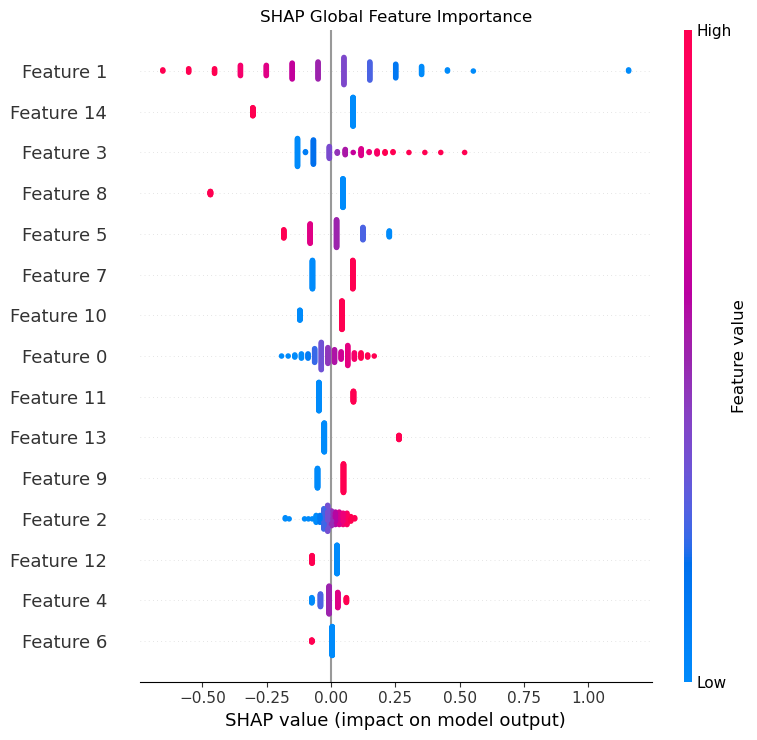

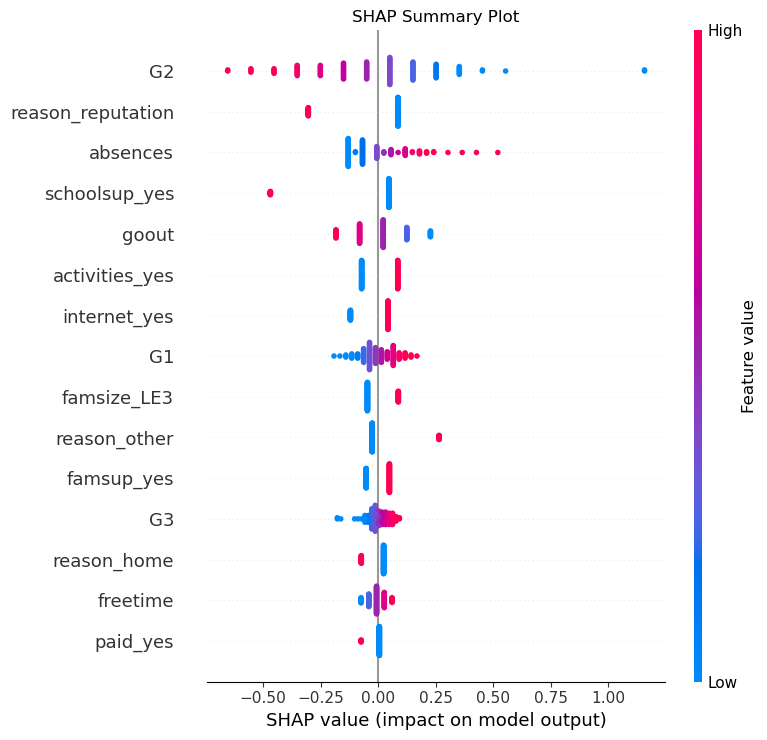

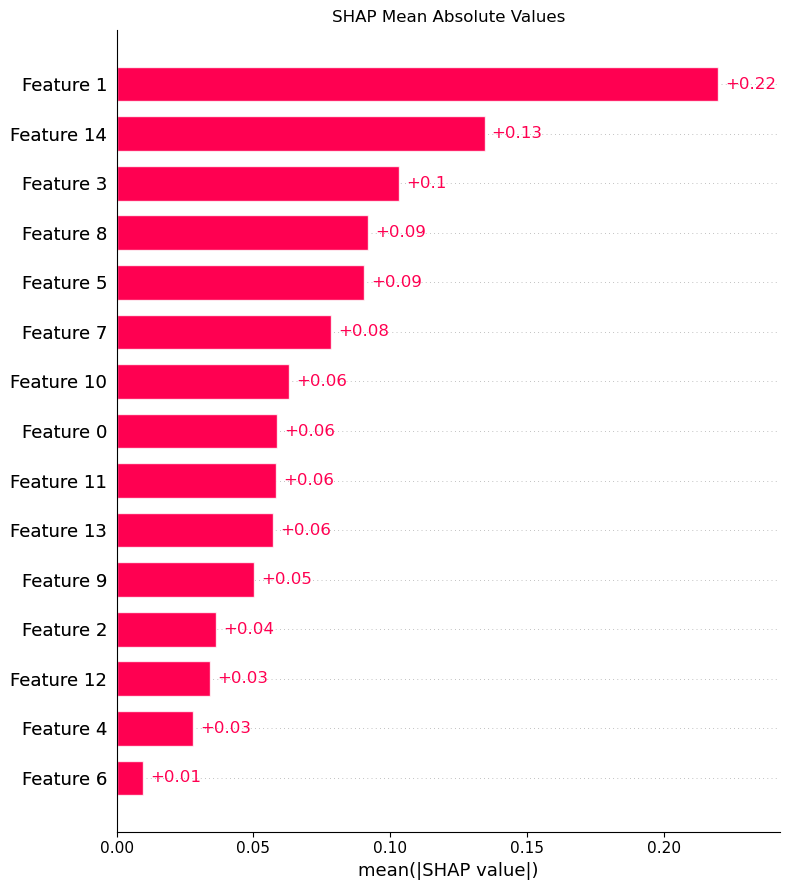

In [67]:
# Global Feature Importance - Fixed
plt.figure(figsize=(10, 8))
try:
    shap.plots.beeswarm(shap_values, max_display=15, show=False)
    plt.title('SHAP Global Feature Importance')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Beeswarm plot error:", e)
    # Alternative: Use bar plot instead
    shap.plots.bar(shap_values, max_display=15, show=False)
    plt.title('SHAP Feature Importance (Bar Plot)')
    plt.tight_layout()
    plt.show()

# Summary Plot - Fixed
plt.figure(figsize=(10, 8))
try:
    # Convert feature names to list to avoid any pandas issues
    feature_names_list = list(X.columns) if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X_test_clean.shape[1])]
    
    shap.summary_plot(shap_values.values, 
                      X_test_clean, 
                      feature_names=feature_names_list, 
                      show=False)
    plt.title('SHAP Summary Plot')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Summary plot error:", e)
    # Alternative: Simple bar plot
    mean_shap = np.abs(shap_values.values).mean(0)
    feature_importance = pd.DataFrame({
        'feature': feature_names_list,
        'importance': mean_shap
    }).sort_values('importance', ascending=False)
    
    plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
    plt.xlabel('Mean |SHAP Value|')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Bar Plot - This should work without issues
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15, show=False)
plt.title('SHAP Mean Absolute Values')
plt.tight_layout()
plt.show()


=== LOCAL EXPLANATIONS ===

Student 13 - Predicted: IN RELATIONSHIP
Key features:
  schoolsup_yes: 0.00 (weight: -0.102)
  reason_reputation: 0.00 (weight: -0.114)


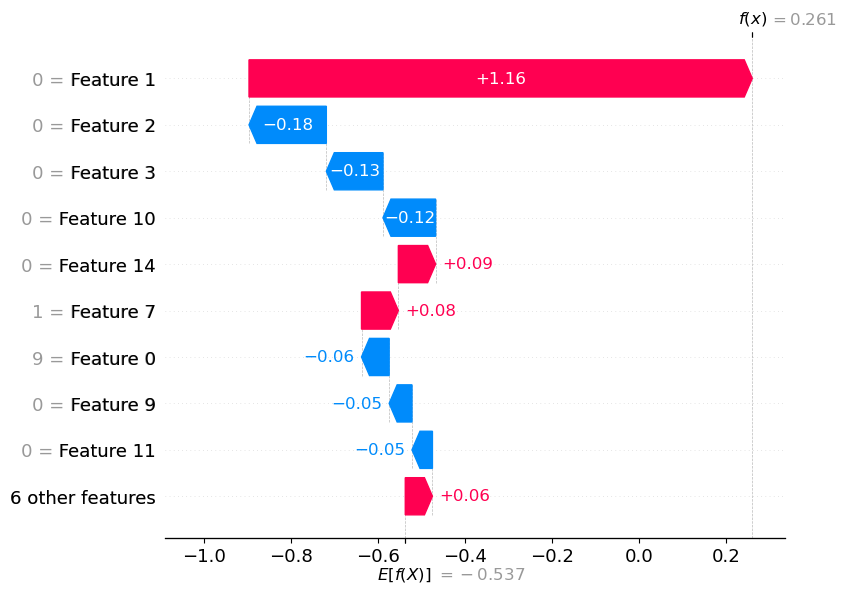

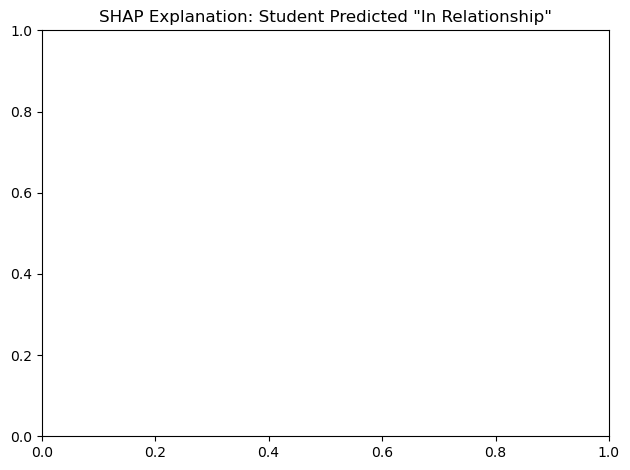


Student 3 - Predicted: NOT IN RELATIONSHIP
Key features:
  schoolsup_yes: 0.00 (weight: -0.102)
  reason_reputation: 1.00 (weight: -0.114)


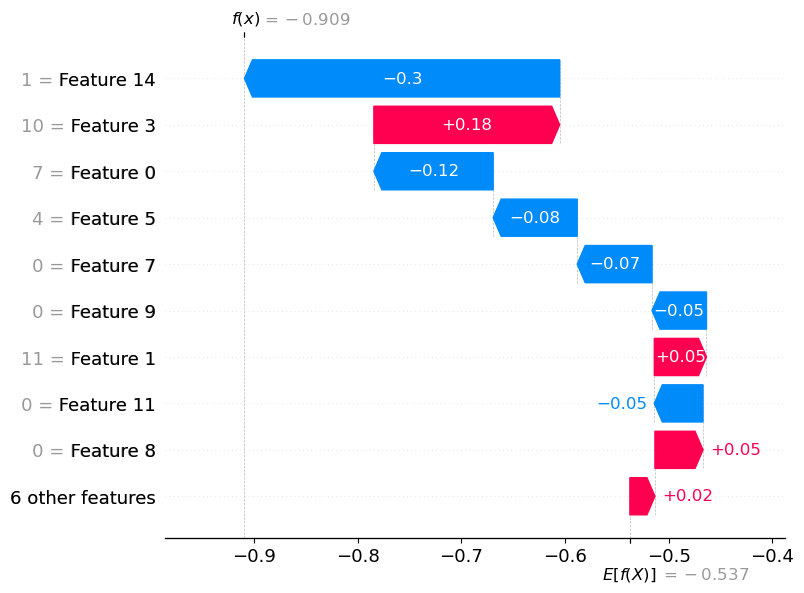

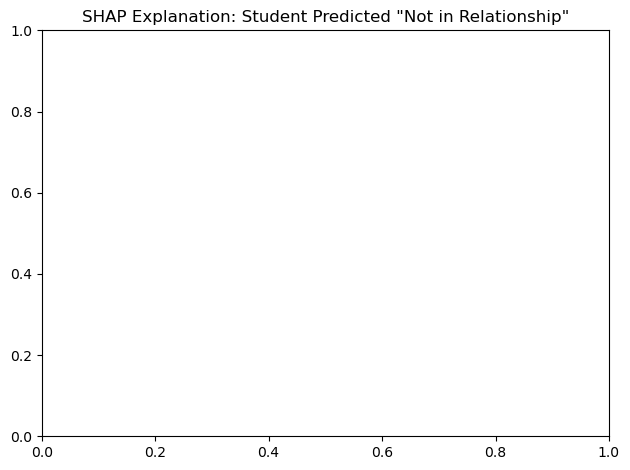

In [68]:
# Find examples: one predicted "Yes" and one predicted "No"
y_pred_test = model.predict(X_test)

# Find indices
yes_idx = np.where((y_pred_test == 1) & (y_test == 1))[0]
no_idx = np.where((y_pred_test == 0) & (y_test == 0))[0]

if len(yes_idx) > 0 and len(no_idx) > 0:
    yes_student = yes_idx[0]
    no_student = no_idx[0]
    
    print("=== LOCAL EXPLANATIONS ===")
    
    # Student predicted as "Yes" (in relationship)
    print(f"\nStudent {yes_student} - Predicted: IN RELATIONSHIP")
    print("Key features:")
    student_yes_features = X_test[yes_student]
    for i, (feature, value) in enumerate(zip(X.columns, student_yes_features)):
        if abs(model.weights[i]) > 0.1:  # Show important features
            print(f"  {feature}: {value:.2f} (weight: {model.weights[i]:.3f})")
    
    # SHAP explanation for "Yes" student
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap_values[yes_student], max_display=10)
    plt.title(f'SHAP Explanation: Student Predicted "In Relationship"')
    plt.tight_layout()
    plt.show()
    
    # Student predicted as "No" (not in relationship)
    print(f"\nStudent {no_student} - Predicted: NOT IN RELATIONSHIP")
    print("Key features:")
    student_no_features = X_test[no_student]
    for i, (feature, value) in enumerate(zip(X.columns, student_no_features)):
        if abs(model.weights[i]) > 0.1:  # Show important features
            print(f"  {feature}: {value:.2f} (weight: {model.weights[i]:.3f})")
    
    # SHAP explanation for "No" student
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap_values[no_student], max_display=10)
    plt.title(f'SHAP Explanation: Student Predicted "Not in Relationship"')
    plt.tight_layout()
    plt.show()


In [69]:
print("=== PLAIN LANGUAGE INTERPRETATION ===")
print("\nWhat Really Drives Relationship Prediction?")

# Analyze top features
top_positive = feature_importance[feature_importance['Weight'] > 0].head(3)
top_negative = feature_importance[feature_importance['Weight'] < 0].head(3)

print("\n🔴 FACTORS THAT INCREASE RELATIONSHIP LIKELIHOOD:")
for _, row in top_positive.iterrows():
    print(f"  • {row['Feature']}: Weight = {row['Weight']:.3f}")
    
print("\n🔵 FACTORS THAT DECREASE RELATIONSHIP LIKELIHOOD:")
for _, row in top_negative.iterrows():
    print(f"  • {row['Feature']}: Weight = {row['Weight']:.3f}")

print("\n📊 KEY INSIGHTS:")
print("1. Academic Performance Impact:")
if 'G3' in X.columns:
    g3_weight = model.weights[X.columns.get_loc('G3')]
    if g3_weight > 0:
        print("   - Higher grades are associated with MORE likely to be in relationships")
    else:
        print("   - Higher grades are associated with LESS likely to be in relationships")

print("\n2. Social Behavior Impact:")
social_features = ['goout', 'freetime', 'activities']
for feature in social_features:
    if feature + '_yes' in X.columns or feature in X.columns:
        # Handle encoded features
        feature_name = feature if feature in X.columns else feature + '_yes'
        if feature_name in X.columns:
            weight = model.weights[X.columns.get_loc(feature_name)]
            print(f"   - {feature}: {'Positive' if weight > 0 else 'Negative'} influence (weight: {weight:.3f})")

print("\n3. Support System Impact:")
support_features = ['famsup_yes', 'schoolsup_yes']
for feature in support_features:
    if feature in X.columns:
        weight = model.weights[X.columns.get_loc(feature)]
        print(f"   - {feature}: {'Positive' if weight > 0 else 'Negative'} influence (weight: {weight:.3f})")

print("\n🎯 BUSINESS IMPLICATIONS:")
print("- Schools can identify students likely to be in relationships")
print("- Understanding factors helps in student counseling")
print("- Academic vs. social balance insights")
print("- Early intervention for at-risk students")

print("\n⚠️  MODEL LIMITATIONS:")
print("- Correlation ≠ Causation")
print("- Missing important social/emotional factors")
print("- Snapshot data (no temporal relationships)")
print("- Potential bias in data collection")


=== PLAIN LANGUAGE INTERPRETATION ===

What Really Drives Relationship Prediction?

🔴 FACTORS THAT INCREASE RELATIONSHIP LIKELIHOOD:
  • reason_other: Weight = 0.075
  • activities_yes: Weight = 0.060
  • internet_yes: Weight = 0.051

🔵 FACTORS THAT DECREASE RELATIONSHIP LIKELIHOOD:
  • reason_reputation: Weight = -0.114
  • schoolsup_yes: Weight = -0.102
  • G2: Weight = -0.081

📊 KEY INSIGHTS:
1. Academic Performance Impact:
   - Higher grades are associated with LESS likely to be in relationships

2. Social Behavior Impact:
   - goout: Negative influence (weight: -0.076)
   - freetime: Positive influence (weight: 0.043)
   - activities: Positive influence (weight: 0.060)

3. Support System Impact:
   - famsup_yes: Positive influence (weight: 0.025)
   - schoolsup_yes: Negative influence (weight: -0.102)

🎯 BUSINESS IMPLICATIONS:
- Schools can identify students likely to be in relationships
- Understanding factors helps in student counseling
- Academic vs. social balance insights
- E

In [32]:
# features = ['G1', 'G2', 'G3', 'absences', 'paid', 'activities', 'schoolsup', 'famsup', 'internet', 'famsize', 'reason','freetime','goout']
# X = df[features]
# X = pd.get_dummies(X, drop_first=True)
# y = df['romantic']

In [33]:
# y = (df['romantic'] == 'yes').astype(int)